In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 60)

In [2]:
df = pd.read_csv(r'src\final_dataset.csv')
df.head()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,email_domain,phone_number,billing_city,billing_postal,billing_state,card_bin,currency,cvv,signature_image,transaction_type,transaction_env,applicant_name,billing_address,merchant_id,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL,event_year,event_month,event_day,event_weekday,event_time_hour,event_time_minutes,browser,operating_system,search_engine,security_level,region,language,network_id,network_id_prefix,host_id,host_id_prefix
0,3371.0,2167.0,56.0,2572.0,perez-garza.com,8781115140,Woodsburgh,96336.0,California,40771.0,cad,D,F,U,X,Linda Wright,4684 Sharon Ranch,066-82-8795,O,59.0,13646.0,legit,2020,12,29,1,9,5,Opera,Windows,Presto,0,NZ,Niuean,154,68,49,124
1,2714.0,2045.0,48.0,4517.0,mcneil-ortega.com,27360139,West Kevin,78083.0,Florida,24480.0,cad,X,X,H,W,Terri Rivera,7642 Allison Ramp,669-99-9459,J,0.0,11930.0,legit,2021,6,22,1,18,5,Opera,Linux,Presto,0,IN,Apatani,39,131,125,85
2,6987.0,2892.0,61.0,5007.0,davis-calderon.com,9835852863,Lorichester,83236.0,Utah,37778.0,cad,X,Q,X,X,Sarah Gray,4948 Lisa Passage,086-41-1624,T,83.0,7412.0,legit,2021,5,10,0,13,48,Mozilla,Linux,Gecko,0,MV,Dhivehi,166,245,194,83
3,2712.0,3040.0,28.0,6022.0,rose-lee.org,6788973420,Stephenmouth,78364.0,Virginia,55790.0,usd,G,G,C,N,Valerie Jenkins,1616 Little Camp,669-97-4021,M,24.0,4623.0,legit,2021,3,11,3,7,36,Mozilla,Macintosh,AppleWebKit,0,ER,Bilen,100,1,217,216
4,3598.0,2976.0,66.0,2600.0,nash.net,132041766,New Brianmouth,77499.0,South Carolina,37370.0,cad,X,F,F,G,Amy Coleman,149 Harris Rapid,088-21-6329,K,21.0,1905.0,legit,2021,3,27,5,6,13,Mozilla,Linux,Gecko,0,NP,Chitwania Tharu,113,156,65,245


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147000 entries, 0 to 146999
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   account_age_days       147000 non-null  float64
 1   transaction_amt        147000 non-null  float64
 2   transaction_adj_amt    147000 non-null  float64
 3   historic_velocity      147000 non-null  float64
 4   email_domain           147000 non-null  object 
 5   phone_number           147000 non-null  int64  
 6   billing_city           147000 non-null  object 
 7   billing_postal         147000 non-null  float64
 8   billing_state          147000 non-null  object 
 9   card_bin               147000 non-null  float64
 10  currency               147000 non-null  object 
 11  cvv                    147000 non-null  object 
 12  signature_image        147000 non-null  object 
 13  transaction_type       147000 non-null  object 
 14  transaction_env        147000 non-nu

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_age_days,147000.0,4.645817e+03,1.153792e+03,1.0,3.824000e+03,4.668000e+03,5.476000e+03,9.119000e+03
transaction_amt,147000.0,2.521344e+03,6.046802e+02,5.0,2.103000e+03,2.543000e+03,2.951000e+03,4.999000e+03
transaction_adj_amt,147000.0,5.420884e+01,1.006813e+01,1.0,4.800000e+01,5.500000e+01,6.100000e+01,9.900000e+01
historic_velocity,147000.0,4.702389e+03,1.188255e+03,50.0,3.872000e+03,4.729000e+03,5.548000e+03,9.999000e+03
phone_number,147000.0,5.031942e+09,2.888349e+09,573828.0,2.525633e+09,5.041456e+09,7.561200e+09,9.999660e+09
billing_postal,147000.0,5.017946e+04,2.838922e+04,503.0,2.529800e+04,5.007200e+04,7.434600e+04,9.995000e+04
card_bin,147000.0,4.183431e+04,1.008209e+04,6040.0,3.538600e+04,4.208600e+04,4.737300e+04,6.763900e+04
days_since_last_logon,147000.0,4.985852e+01,2.920884e+01,0.0,2.400000e+01,5.000000e+01,7.500000e+01,1.000000e+02
inital_amount,147000.0,7.996856e+03,4.047923e+03,1000.0,4.485000e+03,7.999000e+03,1.149500e+04,1.500000e+04
event_year,147000.0,2.020815e+03,3.884147e-01,2020.0,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03


In [5]:
df.describe(include='object').T

,count,unique,top,freq
email_domain,147000,7124,dawson.com,69
billing_city,147000,9169,Richardshire,52
billing_state,147000,50,Indiana,8656
currency,147000,3,cad,111543
cvv,147000,26,D,22787
signature_image,147000,26,H,17024
transaction_type,147000,26,I,15865
transaction_env,147000,26,D,22173
applicant_name,147000,95991,Michael Smith,67
billing_address,147000,146994,209 Benjamin Streets,2


In [6]:
df.isna().sum()

account_age_days         0
transaction_amt          0
transaction_adj_amt      0
historic_velocity        0
email_domain             0
phone_number             0
billing_city             0
billing_postal           0
billing_state            0
card_bin                 0
currency                 0
cvv                      0
signature_image          0
transaction_type         0
transaction_env          0
applicant_name           0
billing_address          0
merchant_id              0
tranaction_initiate      0
days_since_last_logon    0
inital_amount            0
EVENT_LABEL              0
event_year               0
event_month              0
event_day                0
event_weekday            0
event_time_hour          0
event_time_minutes       0
browser                  0
operating_system         0
search_engine            0
security_level           0
region                   0
language                 0
network_id               0
network_id_prefix        0
host_id                  0
h

In [7]:
df.columns = [col.lower() for col in df.columns]

In [8]:
df.head()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,email_domain,phone_number,billing_city,billing_postal,billing_state,card_bin,currency,cvv,signature_image,transaction_type,transaction_env,applicant_name,billing_address,merchant_id,tranaction_initiate,days_since_last_logon,inital_amount,event_label,event_year,event_month,event_day,event_weekday,event_time_hour,event_time_minutes,browser,operating_system,search_engine,security_level,region,language,network_id,network_id_prefix,host_id,host_id_prefix
0,3371.0,2167.0,56.0,2572.0,perez-garza.com,8781115140,Woodsburgh,96336.0,California,40771.0,cad,D,F,U,X,Linda Wright,4684 Sharon Ranch,066-82-8795,O,59.0,13646.0,legit,2020,12,29,1,9,5,Opera,Windows,Presto,0,NZ,Niuean,154,68,49,124
1,2714.0,2045.0,48.0,4517.0,mcneil-ortega.com,27360139,West Kevin,78083.0,Florida,24480.0,cad,X,X,H,W,Terri Rivera,7642 Allison Ramp,669-99-9459,J,0.0,11930.0,legit,2021,6,22,1,18,5,Opera,Linux,Presto,0,IN,Apatani,39,131,125,85
2,6987.0,2892.0,61.0,5007.0,davis-calderon.com,9835852863,Lorichester,83236.0,Utah,37778.0,cad,X,Q,X,X,Sarah Gray,4948 Lisa Passage,086-41-1624,T,83.0,7412.0,legit,2021,5,10,0,13,48,Mozilla,Linux,Gecko,0,MV,Dhivehi,166,245,194,83
3,2712.0,3040.0,28.0,6022.0,rose-lee.org,6788973420,Stephenmouth,78364.0,Virginia,55790.0,usd,G,G,C,N,Valerie Jenkins,1616 Little Camp,669-97-4021,M,24.0,4623.0,legit,2021,3,11,3,7,36,Mozilla,Macintosh,AppleWebKit,0,ER,Bilen,100,1,217,216
4,3598.0,2976.0,66.0,2600.0,nash.net,132041766,New Brianmouth,77499.0,South Carolina,37370.0,cad,X,F,F,G,Amy Coleman,149 Harris Rapid,088-21-6329,K,21.0,1905.0,legit,2021,3,27,5,6,13,Mozilla,Linux,Gecko,0,NP,Chitwania Tharu,113,156,65,245


In [9]:
df.event_label.value_counts()

event_label
legit    138996
fraud      8004
Name: count, dtype: int64

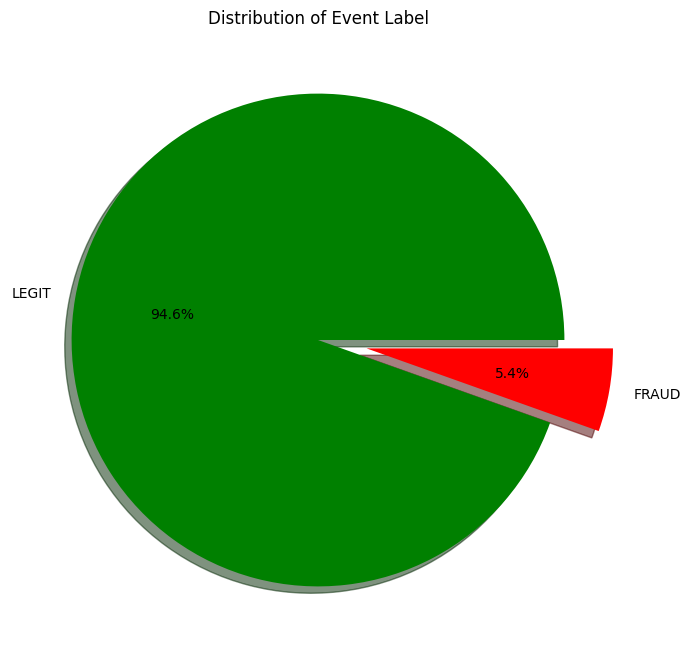

In [11]:
plt.figure(figsize= (8,8))
plt.pie(x = df['event_label'].value_counts(), labels=['LEGIT', 'FRAUD'], colors=['g', 'r'], explode = [0, 0.2 ], shadow = True, autopct='%1.1f%%')
plt.title('Distribution of Event Label')
plt.show()

Text(0.5, 0, 'Transaction Amount')

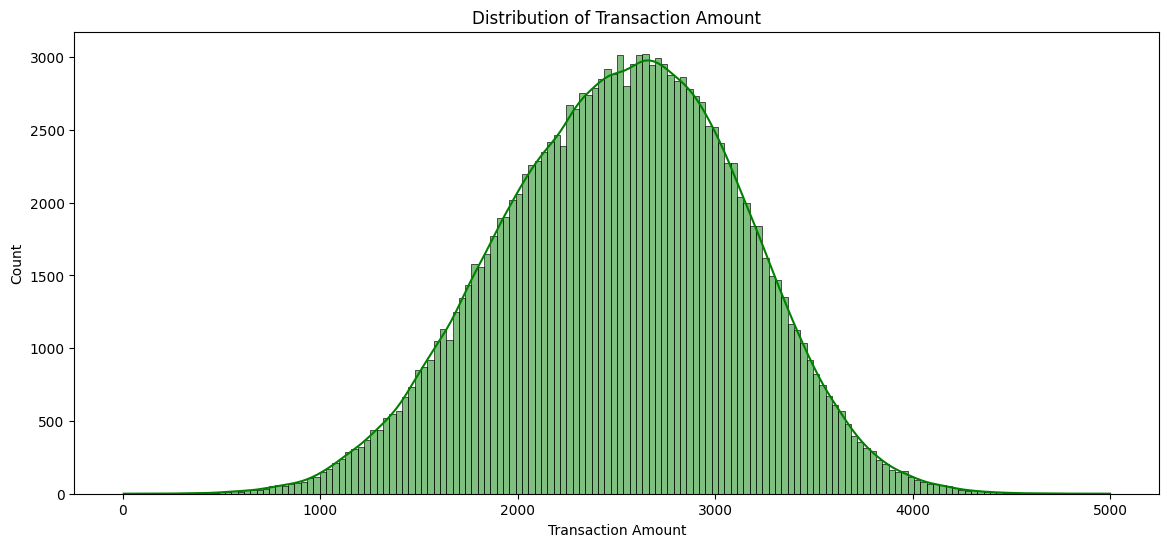

In [13]:
plt.figure(figsize=(14, 6))
sns.histplot(df['transaction_amt'], kde=True, color='green')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')

Text(0.5, 0, 'Transaction Adjust Amount')

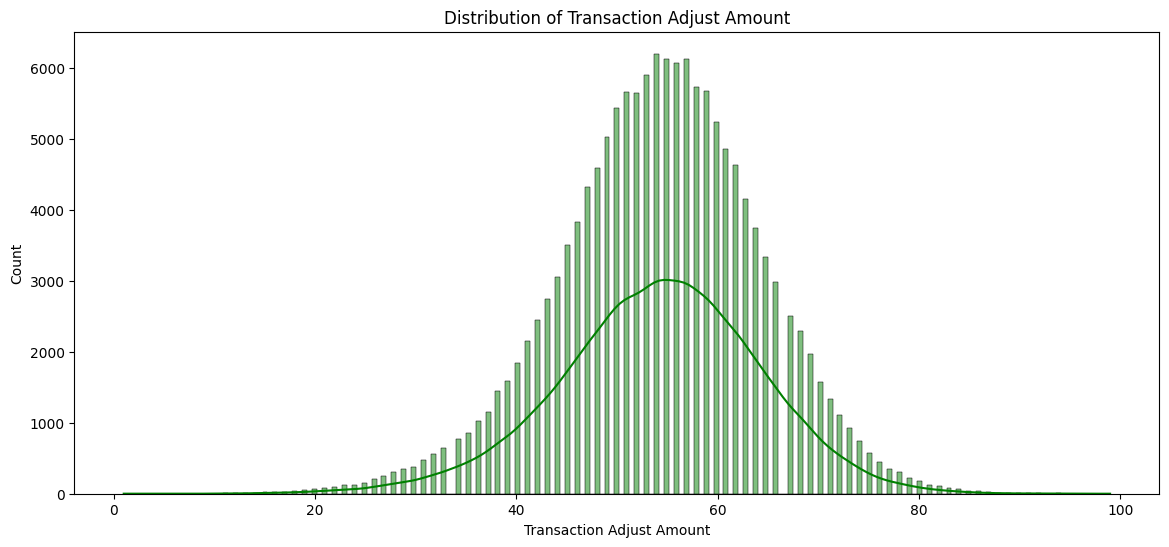

In [15]:
plt.figure(figsize=(14, 6))
sns.histplot(df['transaction_adj_amt'], kde=True, color='green')
plt.title('Distribution of Transaction Adjust Amount')
plt.xlabel('Transaction Adjust Amount')

Text(0.5, 0, 'History Velocity')

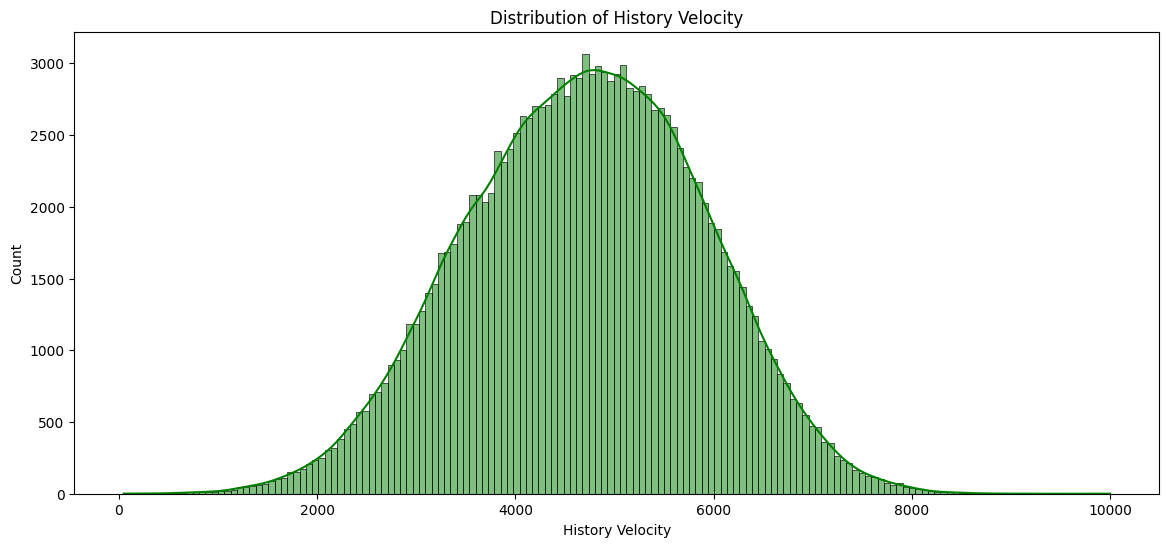

In [16]:
plt.figure(figsize=(14, 6))
sns.histplot(df['historic_velocity'], kde=True, color='green')
plt.title('Distribution of History Velocity')
plt.xlabel('History Velocity')

Text(0.5, 0, 'Initial Amount')

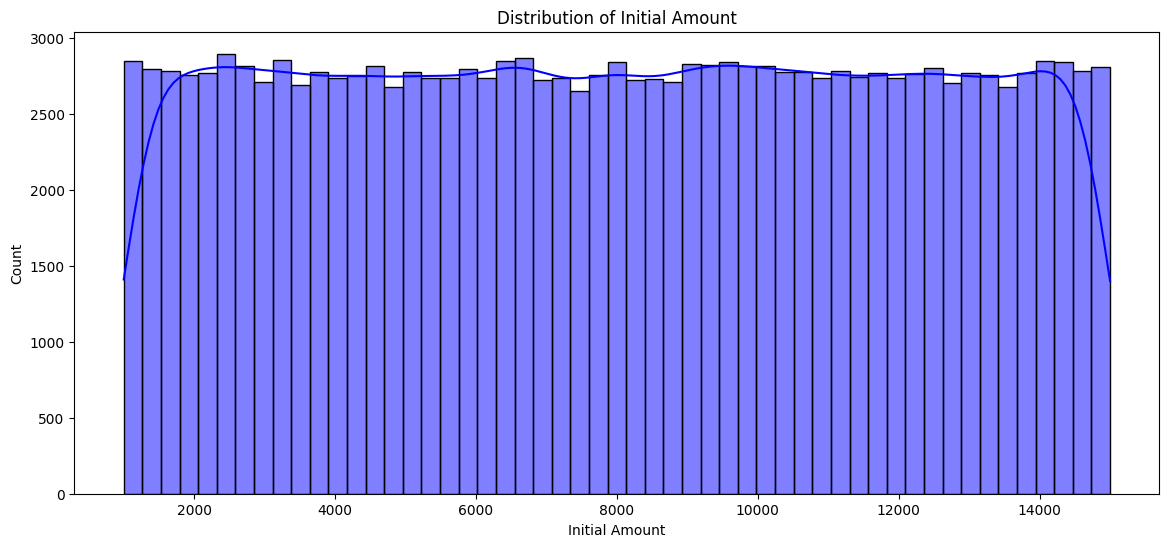

In [18]:
plt.figure(figsize=(14, 6))
sns.histplot(df['inital_amount'], kde=True, color='blue')
plt.title('Distribution of Initial Amount')
plt.xlabel('Initial Amount')

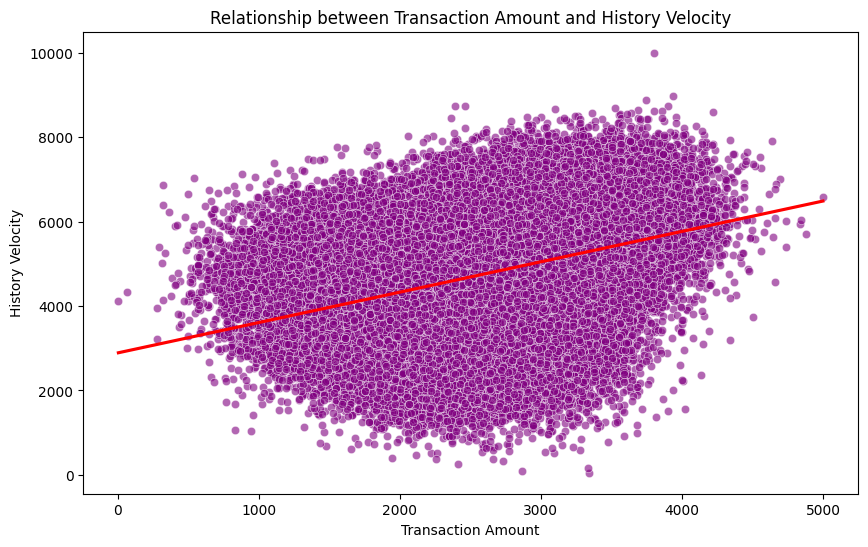

In [24]:
# Scatter plot to show the relationship between Transaction Amount and History Velocity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='transaction_amt', y='historic_velocity', data=df, color='purple', alpha=0.6)
sns.regplot(x='transaction_amt', y='historic_velocity', data=df, scatter=False, color='red')
plt.title('Relationship between Transaction Amount and History Velocity')
plt.xlabel('Transaction Amount')
plt.ylabel('History Velocity')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_14420\437483577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='operating_system', y='transaction_amt', data=df, palette='Set3')


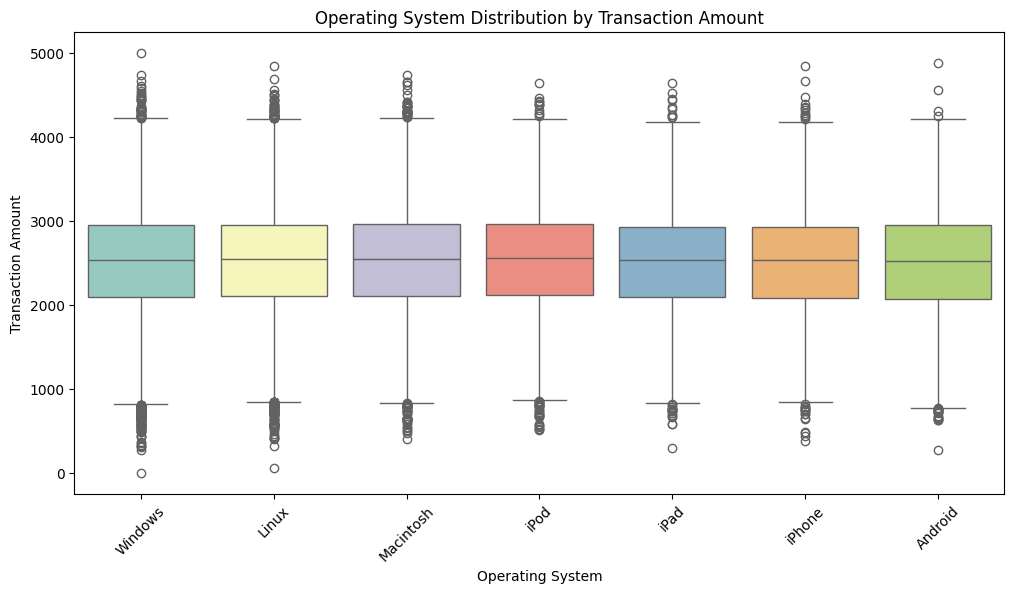

In [26]:
# Box plot to compare Operating System by Transaction Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='operating_system', y='transaction_amt', data=df, palette='Set3')
plt.title('Operating System Distribution by Transaction Amount')
plt.xlabel('Operating System')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14420\442239035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='browser', y='transaction_amt', data=df, palette='Set3')


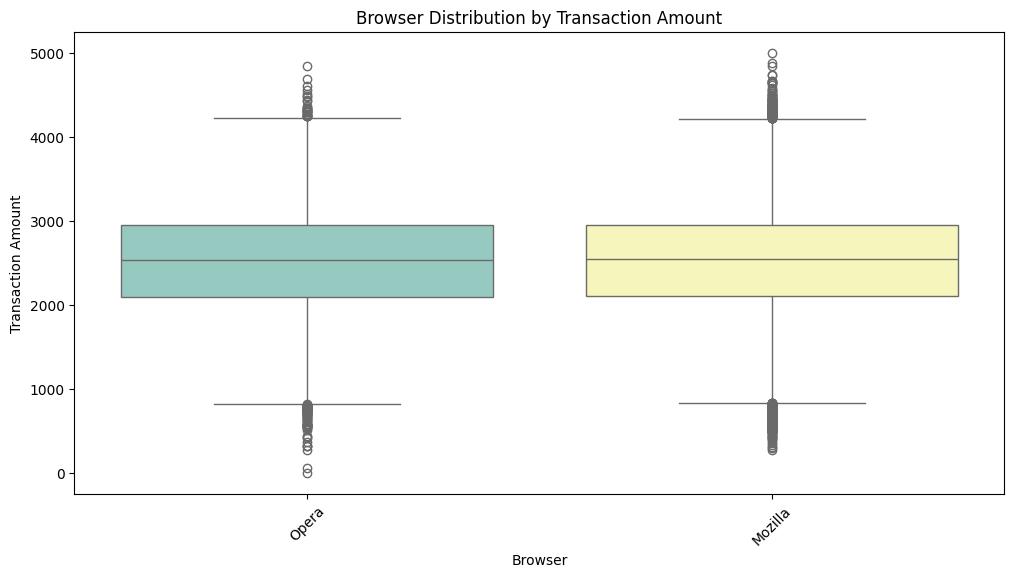

In [27]:
# Box plot to compare Browser by Transaction Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='browser', y='transaction_amt', data=df, palette='Set3')
plt.title('Browser Distribution by Transaction Amount')
plt.xlabel('Browser')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14420\382230163.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='event_label', data=df, palette='Set2')


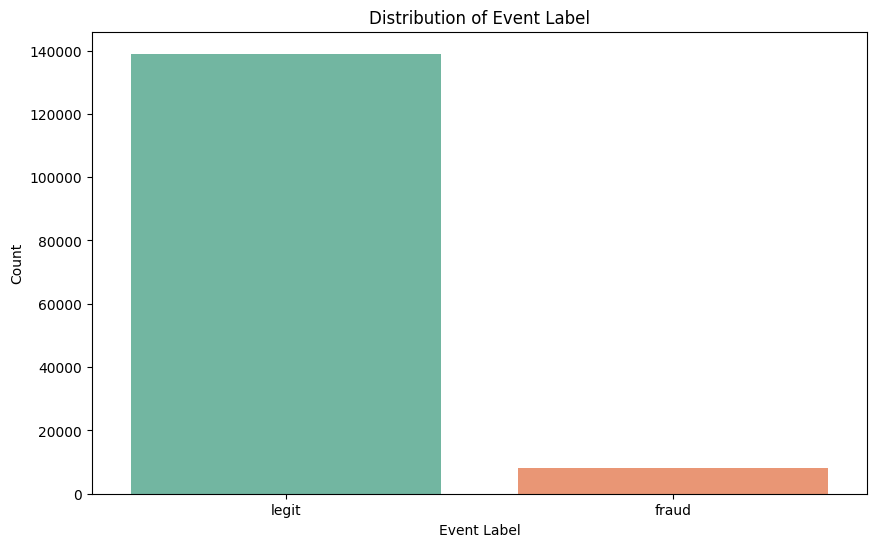

In [29]:
# Plot the distribution of Event Label 
plt.figure(figsize=(10, 6))
sns.countplot(x='event_label', data=df, palette='Set2')
plt.title('Distribution of Event Label')
plt.xlabel('Event Label')
plt.ylabel('Count')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14420\2854825212.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='event_label', y='transaction_amt', data=df, palette='Set3')


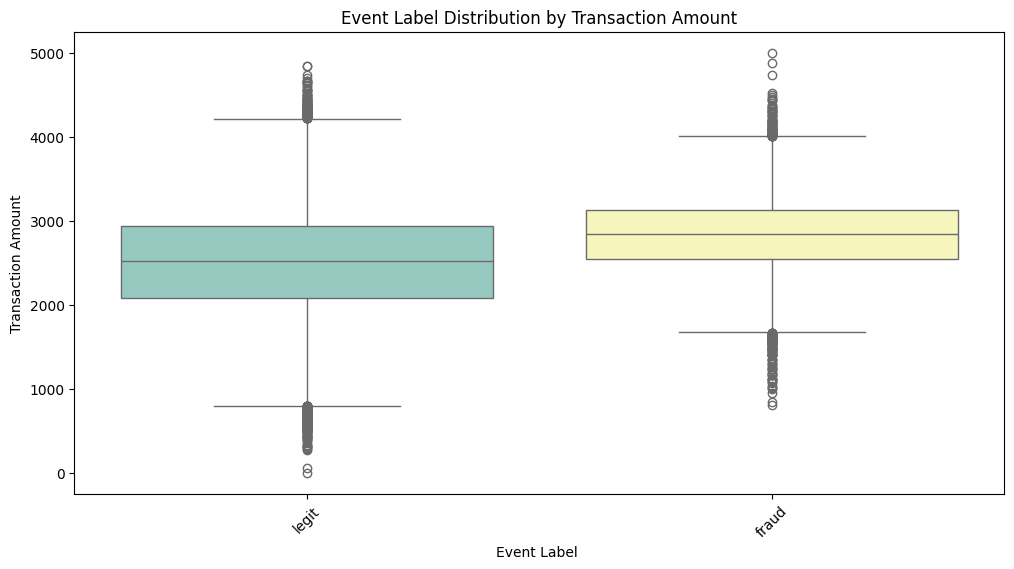

In [30]:
# Box plot to compare Event Label  by Transaction Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='event_label', y='transaction_amt', data=df, palette='Set3')
plt.title('Event Label Distribution by Transaction Amount')
plt.xlabel('Event Label ')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14420\123542877.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='billing_state', y='transaction_amt', data=df, palette='Set3')


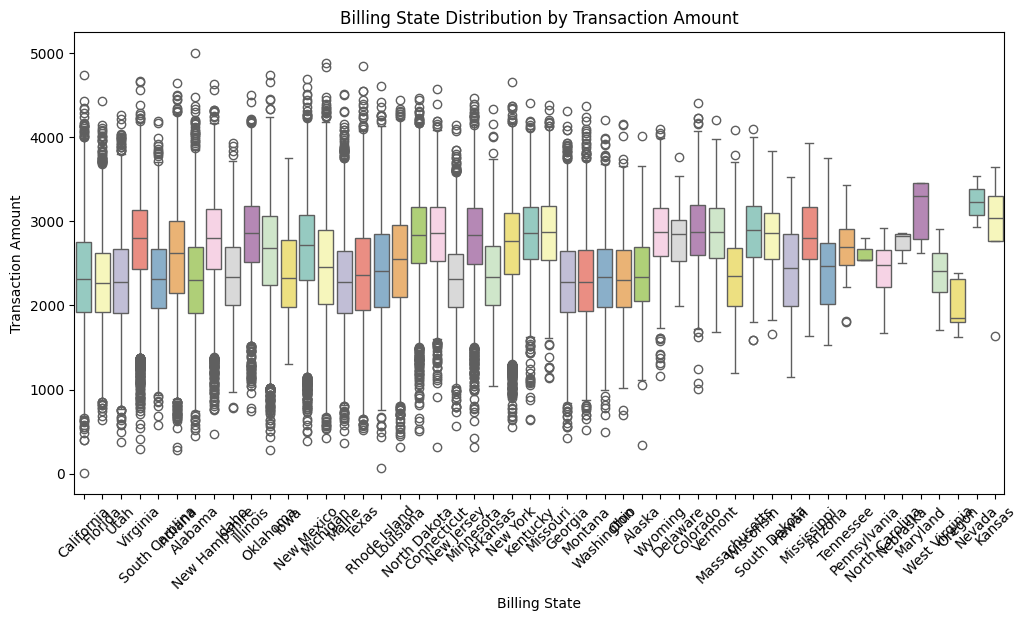

In [32]:
# Box plot to compare Event Label  by Transaction Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='billing_state', y='transaction_amt', data=df, palette='Set3')
plt.title('Billing State Distribution by Transaction Amount')
plt.xlabel('Billing State')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14420\2001760597.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='security_level', y='transaction_amt', data=df, palette='Set3')


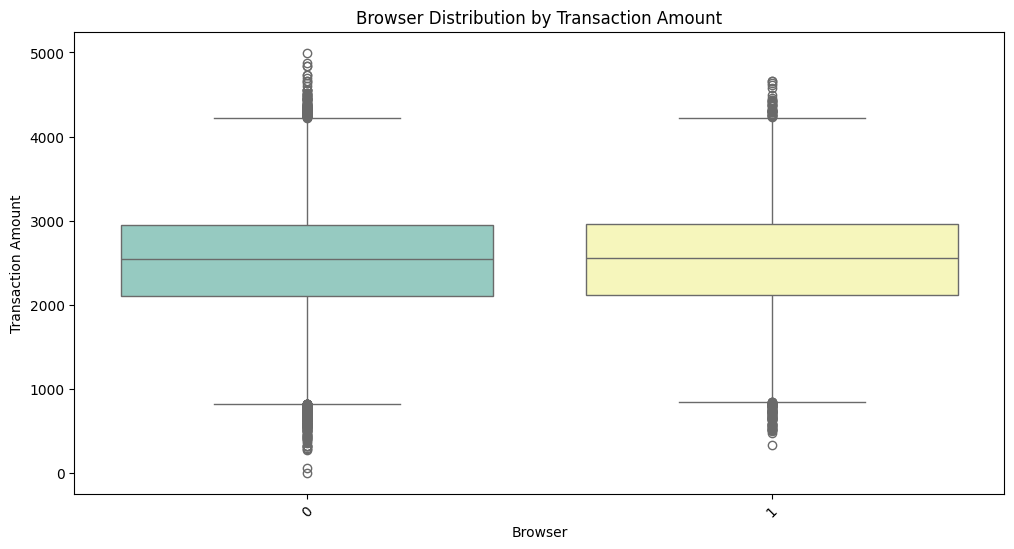

In [33]:
# Box plot to compare Browser by Transaction Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='security_level', y='transaction_amt', data=df, palette='Set3')
plt.title('Browser Distribution by Transaction Amount')
plt.xlabel('Browser')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14420\2731925070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='search_engine', y='transaction_amt', data=df, palette='Set3')


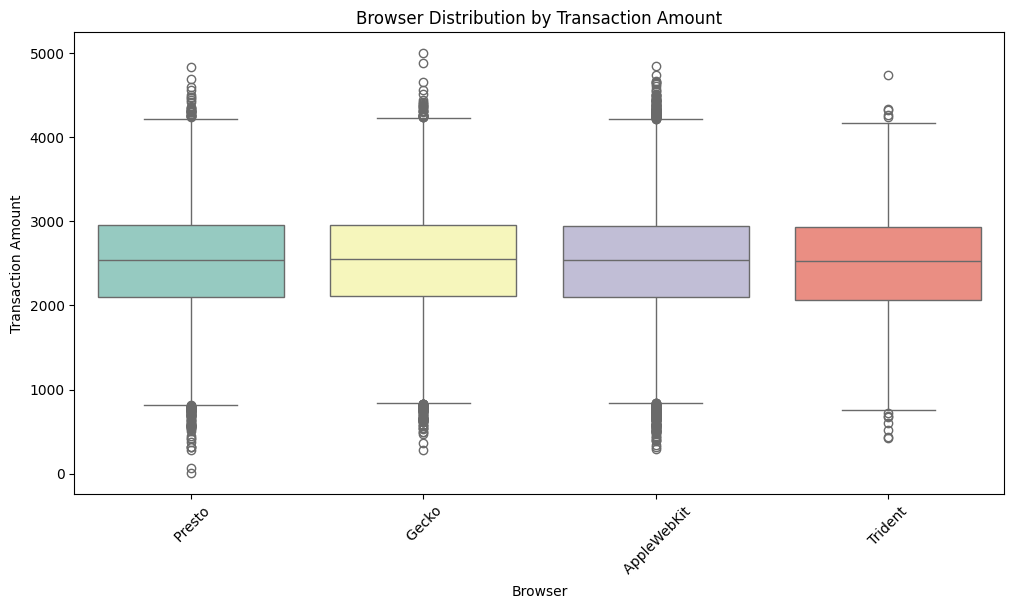

In [34]:
# Box plot to compare Browser by Transaction Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='search_engine', y='transaction_amt', data=df, palette='Set3')
plt.title('Browser Distribution by Transaction Amount')
plt.xlabel('Browser')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

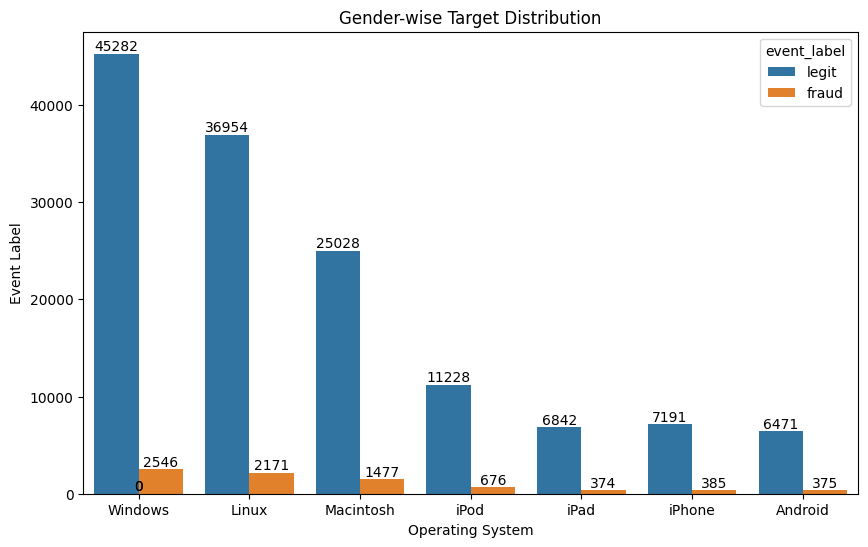

In [35]:
# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='operating_system', hue='event_label')

# Add text labels
counts = df.groupby(['operating_system', 'event_label']).size().unstack(fill_value=0)
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    value = int(y)
    ax.annotate(value, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Set labels and title
plt.xlabel('Operating System')
plt.ylabel('Event Label')
plt.title('Gender-wise Target Distribution')

# Show the plot
plt.show()

In [38]:
counts = df.groupby(['operating_system', 'event_label']).size().unstack(fill_value=0)
counts['total'] = counts['fraud'] +counts['legit']
counts['fraud_'] = (counts['fraud']/counts['total'])*100
counts['legit_'] = (counts['legit']/counts['total'])*100
counts

event_label,fraud,legit,total,fraud_,legit_
operating_system,,,,,
Android,375,6471,6846,5.477651,94.522349
Linux,2171,36954,39125,5.548882,94.451118
Macintosh,1477,25028,26505,5.572533,94.427467
Windows,2546,45282,47828,5.323242,94.676758
iPad,374,6842,7216,5.182927,94.817073
iPhone,385,7191,7576,5.081837,94.918163
iPod,676,11228,11904,5.678763,94.321237


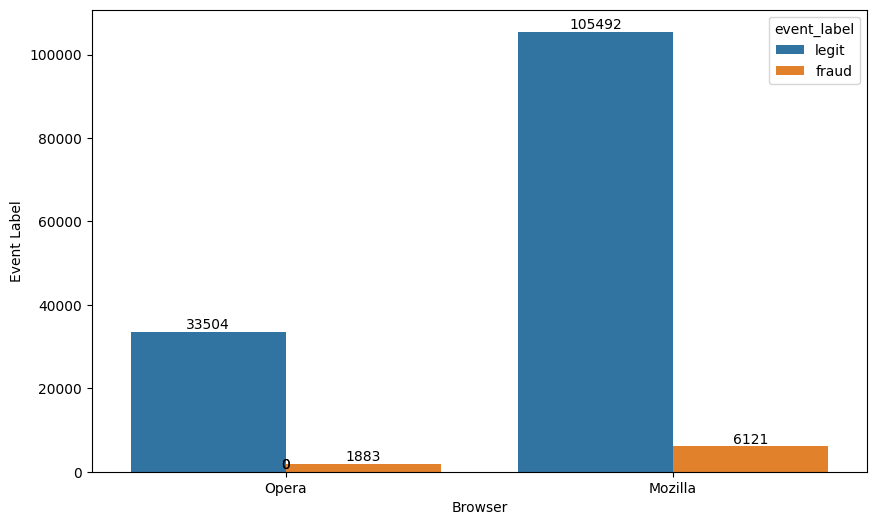

In [39]:
# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='browser', hue='event_label')

# Add text labels
counts = df.groupby(['browser', 'event_label']).size().unstack(fill_value=0)
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    value = int(y)
    ax.annotate(value, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Set labels and title
plt.xlabel('Browser')
plt.ylabel('Event Label')
# plt.title('wiseGender- Target Distribution')

# Show the plot
plt.show()

In [40]:
counts = df.groupby(['browser', 'event_label']).size().unstack(fill_value=0)
counts['total'] = counts['fraud'] +counts['legit']
counts['fraud_'] = (counts['fraud']/counts['total'])*100
counts['legit_'] = (counts['legit']/counts['total'])*100
counts

event_label,fraud,legit,total,fraud_,legit_
browser,,,,,
Mozilla,6121,105492,111613,5.484128,94.515872
Opera,1883,33504,35387,5.321163,94.678837


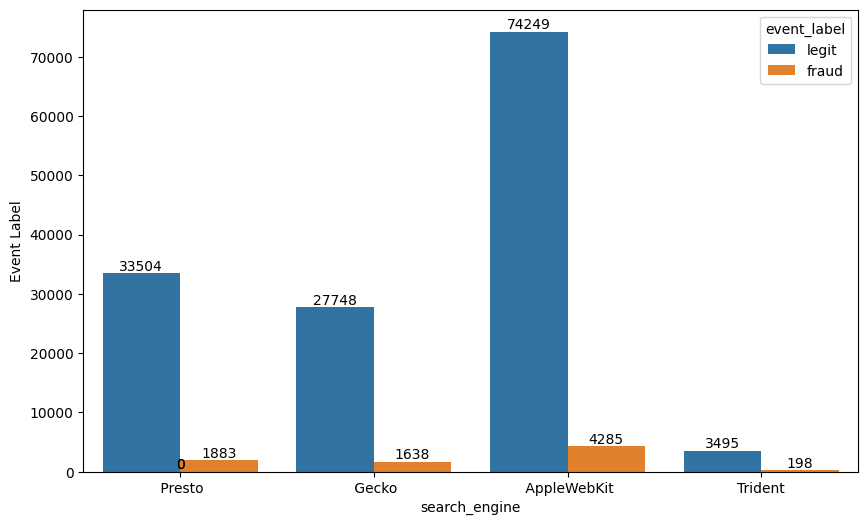

In [43]:
# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='search_engine', hue='event_label')

# Add text labels
counts = df.groupby(['search_engine', 'event_label']).size().unstack(fill_value=0)
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    value = int(y)
    ax.annotate(value, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Set labels and title
plt.xlabel('search_engine')
plt.ylabel('Event Label')
# plt.title('wiseGender- Target Distribution')

# Show the plot
plt.show()

In [45]:
counts = df.groupby(['search_engine', 'event_label']).size().unstack(fill_value=0)
counts['total'] = counts['fraud'] +counts['legit']
counts['fraud_'] = (counts['fraud']/counts['total'])*100
counts['legit_'] = (counts['legit']/counts['total'])*100
counts

event_label,fraud,legit,total,fraud_,legit_
search_engine,,,,,
AppleWebKit,4285,74249,78534,5.456236,94.543764
Gecko,1638,27748,29386,5.574083,94.425917
Presto,1883,33504,35387,5.321163,94.678837
Trident,198,3495,3693,5.361495,94.638505


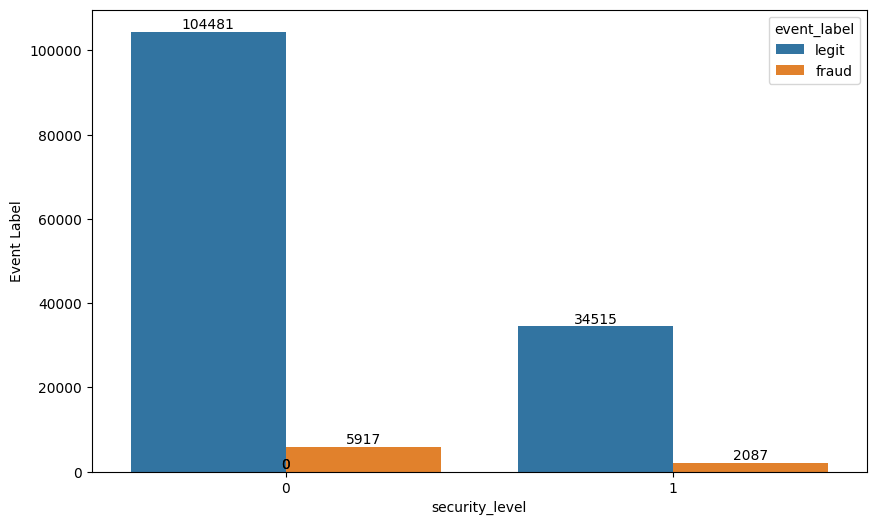

In [44]:
# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='security_level', hue='event_label')

# Add text labels
counts = df.groupby(['security_level', 'event_label']).size().unstack(fill_value=0)
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    value = int(y)
    ax.annotate(value, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Set labels and title
plt.xlabel('security_level')
plt.ylabel('Event Label')
# plt.title('wiseGender- Target Distribution')

# Show the plot
plt.show()

In [42]:
counts = df.groupby(['security_level', 'event_label']).size().unstack(fill_value=0)
counts['total'] = counts['fraud'] +counts['legit']
counts['fraud_'] = (counts['fraud']/counts['total'])*100
counts['legit_'] = (counts['legit']/counts['total'])*100
counts

event_label,fraud,legit,total,fraud_,legit_
security_level,,,,,
0,5917,104481,110398,5.359699,94.640301
1,2087,34515,36602,5.701874,94.298126


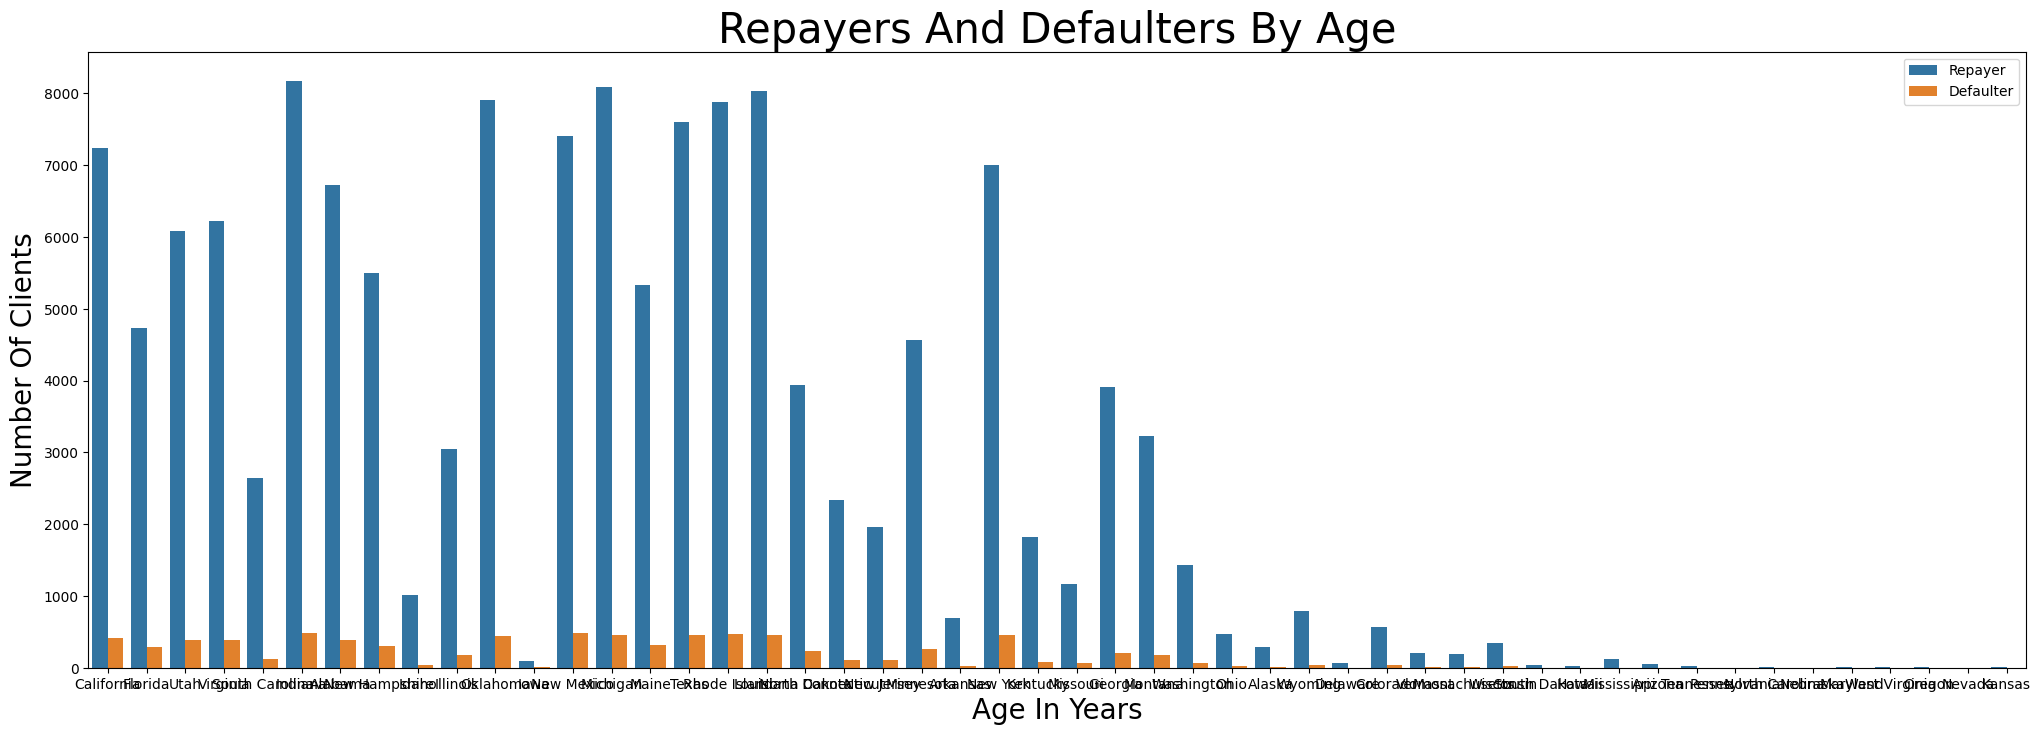

In [46]:
plt.figure(figsize=(25,8))
sns.countplot(x='billing_state',data=df, hue ="event_label")
plt.title("Repayers And Defaulters By Age", fontsize=30)

plt.xlabel("Age In Years", fontsize=20)
plt.ylabel("Number Of Clients", fontsize=20)

plt.legend(labels=["Repayer","Defaulter"],
           loc="upper right")

plt.show()

In [49]:
counts = df.groupby(['billing_state', 'event_label']).size().unstack(fill_value=0)
counts =counts.sort_values('fraud', ascending=False)
counts['total'] = counts['fraud'] +counts['legit']
counts['fraud_'] = (counts['fraud']/counts['total'])*100
counts['legit_'] = (counts['legit']/counts['total'])*100
counts

event_label,fraud,legit,total,fraud_,legit_
billing_state,,,,,
Indiana,485,8171,8656,5.603050,94.396950
New Mexico,479,7412,7891,6.070207,93.929793
Rhode Island,468,7886,8354,5.602107,94.397893
Michigan,462,8090,8552,5.402245,94.597755
Louisiana,460,8030,8490,5.418139,94.581861
Texas,454,7600,8054,5.636951,94.363049
New York,449,7006,7455,6.022803,93.977197
Oklahoma,439,7913,8352,5.256226,94.743774
California,411,7243,7654,5.369741,94.630259


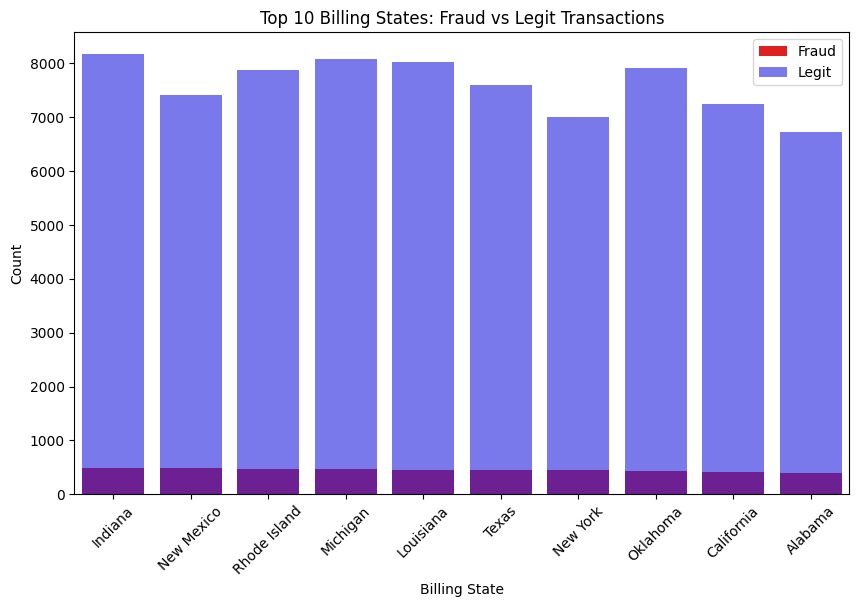

In [50]:
# Select the top 10 fraud counts and corresponding legit counts
top_10 = counts.head(10)

# Plotting the data using seaborn for better aesthetics
plt.figure(figsize=(10, 6))

# Plot fraud and legit for the top 10 states
sns.barplot(x=top_10.index, y=top_10['fraud'], color='red', label='Fraud')
sns.barplot(x=top_10.index, y=top_10['legit'], color='blue', label='Legit', alpha=0.6)

# Adding labels and title
plt.xlabel('Billing State')
plt.ylabel('Count')
plt.title('Top 10 Billing States: Fraud vs Legit Transactions')
plt.xticks(rotation=45)
plt.legend()

In [12]:
df

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,email_domain,phone_number,billing_city,billing_postal,billing_state,card_bin,currency,cvv,signature_image,transaction_type,transaction_env,applicant_name,billing_address,merchant_id,tranaction_initiate,days_since_last_logon,inital_amount,event_label,event_year,event_month,event_day,event_weekday,event_time_hour,event_time_minutes,browser,operating_system,search_engine,security_level,region,language,network_id,network_id_prefix,host_id,host_id_prefix
0,3371.0,2167.0,56.0,2572.0,perez-garza.com,8781115140,Woodsburgh,96336.0,California,40771.0,cad,D,F,U,X,Linda Wright,4684 Sharon Ranch,066-82-8795,O,59.0,13646.0,legit,2020,12,29,1,9,5,Opera,Windows,Presto,0,NZ,Niuean,154,68,49,124
1,2714.0,2045.0,48.0,4517.0,mcneil-ortega.com,27360139,West Kevin,78083.0,Florida,24480.0,cad,X,X,H,W,Terri Rivera,7642 Allison Ramp,669-99-9459,J,0.0,11930.0,legit,2021,6,22,1,18,5,Opera,Linux,Presto,0,IN,Apatani,39,131,125,85
2,6987.0,2892.0,61.0,5007.0,davis-calderon.com,9835852863,Lorichester,83236.0,Utah,37778.0,cad,X,Q,X,X,Sarah Gray,4948 Lisa Passage,086-41-1624,T,83.0,7412.0,legit,2021,5,10,0,13,48,Mozilla,Linux,Gecko,0,MV,Dhivehi,166,245,194,83
3,2712.0,3040.0,28.0,6022.0,rose-lee.org,6788973420,Stephenmouth,78364.0,Virginia,55790.0,usd,G,G,C,N,Valerie Jenkins,1616 Little Camp,669-97-4021,M,24.0,4623.0,legit,2021,3,11,3,7,36,Mozilla,Macintosh,AppleWebKit,0,ER,Bilen,100,1,217,216
4,3598.0,2976.0,66.0,2600.0,nash.net,132041766,New Brianmouth,77499.0,South Carolina,37370.0,cad,X,F,F,G,Amy Coleman,149 Harris Rapid,088-21-6329,K,21.0,1905.0,legit,2021,3,27,5,6,13,Mozilla,Linux,Gecko,0,NP,Chitwania Tharu,113,156,65,245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146995,3986.0,2890.0,57.0,4544.0,garza-harper.org,5540099294,West Tara,34817.0,Washington,30017.0,cad,W,D,S,W,Heather Burke,63652 Kimberly Islands Apt. 674,330-78-4517,M,99.0,6681.0,legit,2020,11,20,4,16,34,Mozilla,Windows,Trident,0,US,Yiddish,92,98,51,182
146996,5834.0,1875.0,61.0,4369.0,henderson-rivas.com,1754778512,New Sarafurt,35879.0,Indiana,65507.0,cad,I,X,W,Z,Pamela Hunter,007 Chavez Bypass Suite 092,867-31-4925,I,85.0,2402.0,legit,2021,3,31,2,1,40,Mozilla,Linux,Gecko,0,ER,Tigrinya,137,17,200,201
146997,4781.0,3371.0,48.0,5135.0,larsen-wright.com,2273743408,Priceburgh,84167.0,Illinois,47079.0,cad,D,H,I,D,Julie Evans,76186 Anderson Ridge,120-07-6784,G,22.0,4113.0,legit,2021,1,17,6,8,51,Mozilla,Macintosh,Gecko,0,BE,Walloon,97,11,159,151
146998,6085.0,2306.0,59.0,4846.0,hughes-chen.com,1196028479,Rogersbury,80391.0,Oklahoma,25891.0,cad,X,U,Z,X,Joseph Hunt,7328 Wood Inlet,346-52-6342,W,70.0,4531.0,legit,2021,1,17,6,5,17,Mozilla,iPhone,AppleWebKit,0,KZ,Kazakh,88,43,40,52
